Task 1: Utilize Libraries / Load CIFAR-10 Dataset

In [3]:
# Task 1: Import Libraries and Load CIFAR-10 Dataset

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Flatten labels for easier handling
y_train = y_train.flatten()
y_test = y_test.flatten()

# CIFAR-10 class labels
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Dataset overview
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Number of classes:", len(np.unique(y_train)))
print("Sample label (as number):", y_train[0])
print("Sample label (as class name):", class_names[y_train[0]])


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Number of classes: 10
Sample label (as number): 6
Sample label (as class name): Frog


Task 2: Generate at least two EDA Visualisations

<ipython-input-4-cded491493fe>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='Set2')


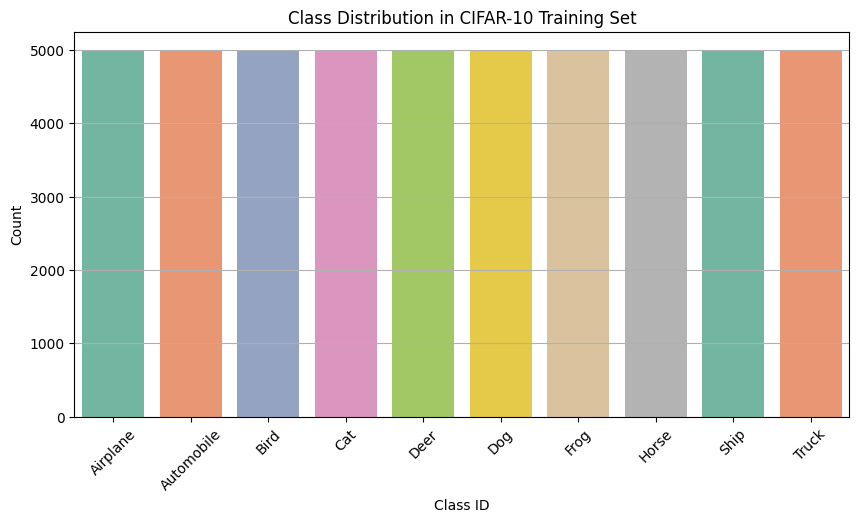

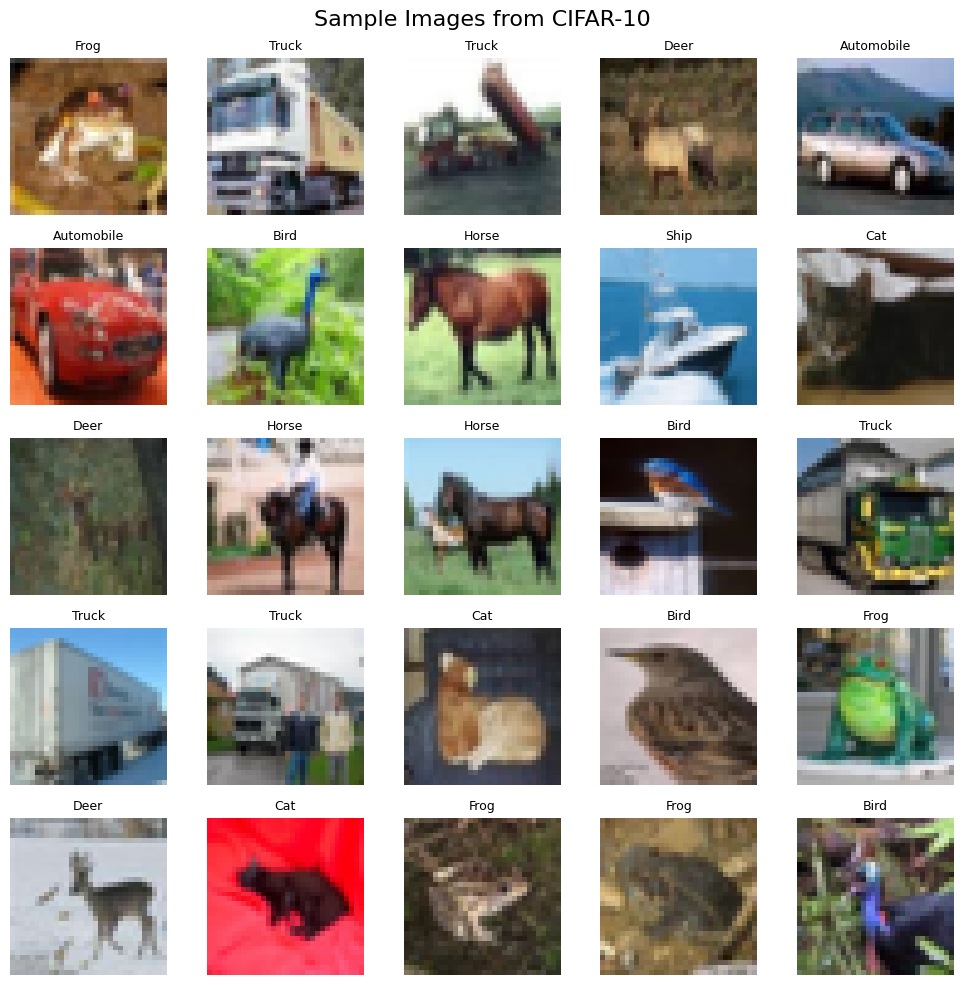

In [4]:
# Task 2: EDA Visualizations

# 1. Class distribution
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train, palette='Set2')
plt.title("Class Distribution in CIFAR-10 Training Set")
plt.xlabel("Class ID")
plt.ylabel("Count")
plt.xticks(ticks=np.arange(10), labels=class_names, rotation=45)
plt.grid(axis='y')
plt.show()

# 2. Sample image grid (5x5)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i]], fontsize=9)
    plt.axis('off')
plt.suptitle("Sample Images from CIFAR-10", fontsize=16)
plt.tight_layout()
plt.show()


Task 3: Check for Missing Values & Data Quality Issues

In [5]:
# Task 3: Analyze Data Quality

# 1. Check for missing (NaN) values
print("NaN check in X_train:", np.isnan(X_train).sum())
print("NaN check in y_train:", np.isnan(y_train).sum())

# 2. Confirm pixel value ranges
print("Pixel value range in X_train:", X_train.min(), "to", X_train.max())

# 3. Verify image shapes
print("Shape of a single image:", X_train[0].shape)

# 4. Check class balance (optional double-check)
unique_classes, class_counts = np.unique(y_train, return_counts=True)
for i, count in zip(unique_classes, class_counts):
    print(f"{class_names[i]:<10}: {count} samples")


NaN check in X_train: 0
NaN check in y_train: 0
Pixel value range in X_train: 0 to 255
Shape of a single image: (32, 32, 3)
Airplane  : 5000 samples
Automobile: 5000 samples
Bird      : 5000 samples
Cat       : 5000 samples
Deer      : 5000 samples
Dog       : 5000 samples
Frog      : 5000 samples
Horse     : 5000 samples
Ship      : 5000 samples
Truck     : 5000 samples


Task 4: Construct a CNN Model

In [6]:
# Task 4: Build CNN Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Normalize pixel values to [0, 1] range
X_train_norm = X_train.astype('float32') / 255.0
X_test_norm = X_test.astype('float32') / 255.0

# One-hot encode the labels
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Define the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),

    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes
])

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Model summary
cnn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Task 5: Train the CNN Model Using CIFAR-10

In [8]:
# Task 5: Train the CNN Model

# Train the model
cnn_history = cnn_model.fit(
    X_train_norm, y_train_cat,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    verbose=1  # shows progress per epoch
)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 94ms/step - accuracy: 0.3189 - loss: 1.8331 - val_accuracy: 0.5388 - val_loss: 1.2914
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 91ms/step - accuracy: 0.5344 - loss: 1.2961 - val_accuracy: 0.6056 - val_loss: 1.0871
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 93ms/step - accuracy: 0.6058 - loss: 1.1100 - val_accuracy: 0.6535 - val_loss: 0.9836
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 95ms/step - accuracy: 0.6460 - loss: 1.0039 - val_accuracy: 0.6666 - val_loss: 0.9401
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 91ms/step - accuracy: 0.6767 - loss: 0.9251 - val_accuracy: 0.6835 - val_loss: 0.9019
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 90ms/step - accuracy: 0.6895 - loss: 0.8814 - val_accuracy: 0.6989 - val_loss: 0.8531
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.7050 - loss: 0.8336 - val_accuracy: 0.7239 - val_loss: 0.7917
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 90ms/step - accuracy: 0.7283 - loss: 0.7677 - 

Task 6: Display Model Architecture and Training Progress

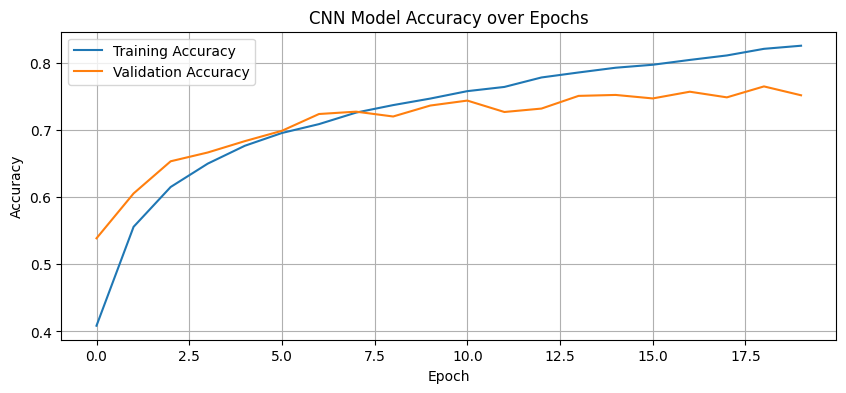

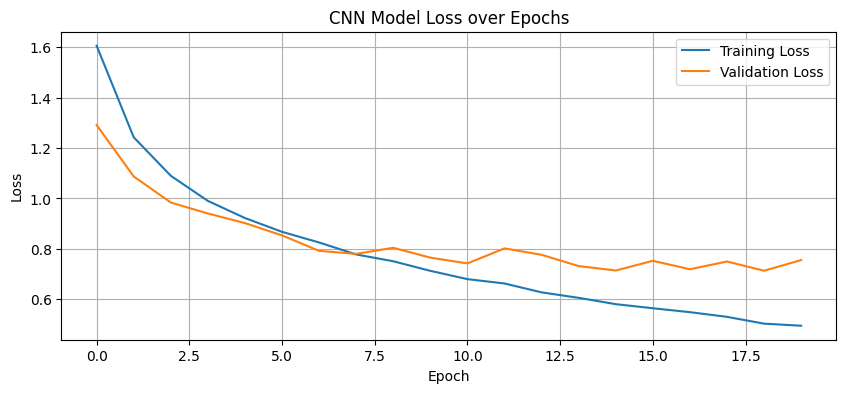

In [9]:
# Task 6: Plot Training and Validation Accuracy

plt.figure(figsize=(10, 4))
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 4))
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Task 7: Construct a Vision Transformer (ViT) Model

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Config
input_shape = (32, 32, 3)
patch_size = 4
num_classes = 10
projection_dim = 64
num_heads = 8
transformer_units = [128, 64]
transformer_layers = 4
dropout_rate = 0.1

# Number of patches
num_patches = (input_shape[0] // patch_size) ** 2
patch_dim = patch_size * patch_size * 3

# Patching layer
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID"
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

# Positional encoder layer
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(input_dim=num_patches, output_dim=projection_dim)

    def call(self, patch):
        positions = tf.range(start=0, limit=num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

# Input
inputs = layers.Input(shape=input_shape)
patches = Patches(patch_size)(inputs)
encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

# Transformer blocks
for _ in range(transformer_layers):
    x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    attention_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=projection_dim)(x1, x1)
    x2 = layers.Add()([attention_output, encoded_patches])

    x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
    x3 = layers.Dense(transformer_units[0], activation="relu")(x3)
    x3 = layers.Dense(projection_dim)(x3)
    encoded_patches = layers.Add()([x3, x2])

# Final classification head
representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
representation = layers.Flatten()(representation)
representation = layers.Dropout(dropout_rate)(representation)
features = layers.Dense(128, activation="relu")(representation)
logits = layers.Dense(num_classes, activation="softmax")(features)

# Create and compile model
vit_model = models.Model(inputs=inputs, outputs=logits)
vit_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

vit_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patches (Patches)   │ (None, None, 48)  │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patch_encoder       │ (None, 64, 64)    │      7,232 │ patches[0][0]     │
│ (PatchEncoder)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 64, 64)    │        128 │ patch_encoder[0]… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 64, 64)    │    132,672 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 64, 64)    │          0 │ multi_head_atten… │
│                     │                   │            │ patch_encoder[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 64, 64)    │        128 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 64, 128)   │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64, 64)    │      8,256 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 64, 64)    │          0 │ dense_4[0][0],    │
│                     │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 64, 64)    │        128 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 64, 64)    │    132,672 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 64, 64)    │          0 │ multi_head_atten… │
│                     │                   │            │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 64, 64)    │        128 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 64, 128)   │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 64, 64)    │      8,256 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 64, 64)    │          0 │ dense_6[0][0],    │
│                     │                   │            │ add_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 64, 64)    │        128 │ add_3[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 1,131,082 (4.31 MB)

 Trainable params: 1,131,082 (4.31 MB)

 Non-trainable params: 0 (0.00 B)

Building a Simple Custom ViT in Keras

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Configuration
input_shape = (32, 32, 3)
patch_size = 4
num_classes = 10
projection_dim = 64
num_heads = 4
transformer_units = [128, 64]  # MLP layers in transformer block
transformer_layers = 4
dropout_rate = 0.1

# Calculate number of patches
num_patches = (input_shape[0] // patch_size) ** 2
patch_dim = patch_size * patch_size * 3  # 4x4x3 = 48

# Custom Patching Layer
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding='VALID'
        )
        patch_dims = patches.shape[-1]
        return tf.reshape(patches, [batch_size, -1, patch_dims])

# Positional + Linear Projection
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(input_dim=num_patches, output_dim=projection_dim)

    def call(self, patch):
        positions = tf.range(start=0, limit=num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

# Input
inputs = layers.Input(shape=input_shape)

# Patching
patches = Patches(patch_size)(inputs)

# Encoding
encoded_patches = PatchEncoder(num_patches=num_patches, projection_dim=projection_dim)(patches)

# Transformer blocks
for _ in range(transformer_layers):
    # Layer Norm + MSA
    x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    attention_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=projection_dim)(x1, x1)
    x2 = layers.Add()([attention_output, encoded_patches])

    # Layer Norm + MLP
    x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
    x3 = layers.Dense(transformer_units[0], activation='relu')(x3)
    x3 = layers.Dense(projection_dim)(x3)
    encoded_patches = layers.Add()([x3, x2])

# Head
representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
representation = layers.Flatten()(representation)
representation = layers.Dropout(dropout_rate)(representation)
features = layers.Dense(128, activation='relu')(representation)
logits = layers.Dense(num_classes, activation='softmax')(features)

# Model
vit_model = models.Model(inputs=inputs, outputs=logits)

# Compile
vit_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Summary
vit_model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patches_1 (Patches) │ (None, None, 48)  │          0 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patch_encoder_1     │ (None, 64, 64)    │      7,232 │ patches_1[0][0]   │
│ (PatchEncoder)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 64, 64)    │        128 │ patch_encoder_1[… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 64, 64)    │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_8 (Add)         │ (None, 64, 64)    │          0 │ multi_head_atten… │
│                     │                   │            │ patch_encoder_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 64, 64)    │        128 │ add_8[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 64, 128)   │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 64, 64)    │      8,256 │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_9 (Add)         │ (None, 64, 64)    │          0 │ dense_15[0][0],   │
│                     │                   │            │ add_8[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 64, 64)    │        128 │ add_9[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 64, 64)    │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_10 (Add)        │ (None, 64, 64)    │          0 │ multi_head_atten… │
│                     │                   │            │ add_9[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 64, 64)    │        128 │ add_10[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 64, 128)   │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 64, 64)    │      8,256 │ dense_16[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_11 (Add)        │ (None, 64, 64)    │          0 │ dense_17[0][0],   │
│                     │                   │            │ add_10[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 64, 64)    │        128 │ add_11[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 865,866 (3.30 MB)

 Trainable params: 865,866 (3.30 MB)

 Non-trainable params: 0 (0.00 B)

Task 8: Train the Vision Transformer (ViT)

In [13]:
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Print shape to confirm
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)


In [14]:
# Normalize pixel values
X_train_norm = X_train.astype("float32") / 255.0
X_test_norm = X_test.astype("float32") / 255.0

# One-hot encode labels
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)


In [18]:
vit_history = vit_model.fit(
    X_train_norm, y_train_cat,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 364s 582ms/step - accuracy: 0.8279 - loss: 0.4901 - val_accuracy: 0.6529 - val_loss: 1.0970
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 376s 601ms/step - accuracy: 0.8523 - loss: 0.4247 - val_accuracy: 0.6539 - val_loss: 1.1544
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 422s 666ms/step - accuracy: 0.8739 - loss: 0.3575 - val_accuracy: 0.6506 - val_loss: 1.2523
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 377s 604ms/step - accuracy: 0.8914 - loss: 0.3134 - val_accuracy: 0.6504 - val_loss: 1.2746
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 368s 581ms/step - accuracy: 0.9096 - loss: 0.2634 - val_accuracy: 0.6592 - val_loss: 1.3435


Task 9: Plot Training & Validation Metrics

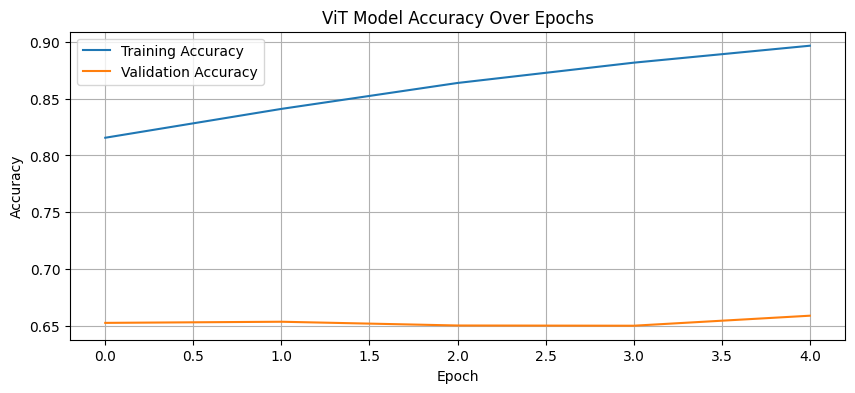

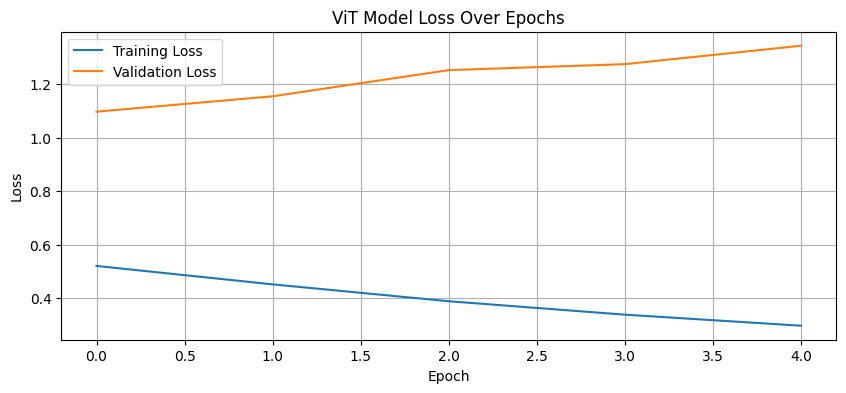

In [19]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(10, 4))
plt.plot(vit_history.history['accuracy'], label='Training Accuracy')
plt.plot(vit_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ViT Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(10, 4))
plt.plot(vit_history.history['loss'], label='Training Loss')
plt.plot(vit_history.history['val_loss'], label='Validation Loss')
plt.title('ViT Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
